# Random Forest: first run
Total dataset size: 134 samples <br>
Training set: 100 samples <br>
Testing set: 34 samples

Features used:
- LTA precipitation (mmpa)
- LTA WD (days)
- LTA PET (mm)
- Aridity idx
- NDVI idx
- Aquifer group (cat.)
- Soil group (cat.)
- Landcover (cat.)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

# read file (data + coordinates)
file = pd.read_csv('poc.csv')
file = file[file['Recharge_mmpa']!= 0.1]
# extract data only for one-hot encoding
data = file.drop(columns=['Lat', 'Long', 'ID'])
file

,Recharge_mmpa,LTA_P_mmpa,LTA_WD_days,LTA_PET_mm,Aridity,NDVI,Aquifer_group,Soil_group,Landcover,DEM,Lat,Long,ID
0,253.0,1234.743356,106.025664,1265.000000,0.977426,0.500297,Basement,LX,shrubland,318,8.49,4.48,1
1,22.0,555.876675,67.369998,1386.030028,0.403442,0.393288,Basement,AC,grassland,893,-20.27,30.09,2
2,245.0,1376.716688,192.223329,1337.440024,1.029575,0.822648,Basement,NT,forest,1185,0.46,32.96,3
3,185.0,518.196676,59.429665,1590.610029,0.326188,0.281173,Sedimentary,LP,sparse,1793,13.54,39.82,4
4,120.0,1344.580024,139.171331,1298.693353,1.038857,0.650012,Sedimentary,NT,cropland,25,6.50,2.30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,100.0,655.280013,85.363665,1356.070025,0.486649,0.418166,Sedimentary,LP,shrubland,1538,-26.00,27.70,130
130,80.0,816.720013,80.897665,1266.233355,0.648767,0.505522,Basement,CM,shrubland,1367,-17.71,30.55,131
131,8.0,510.140009,68.636998,1922.536704,0.265403,0.374362,Unconsolidated,GL,cropland,51,14.72,-17.00,132
132,160.0,1215.073356,99.186665,1149.026683,1.058098,0.457696,Sedimentary,LP,cropland,1899,9.40,38.64,133


In [2]:
# One-hot encode the data using pandas get_dummies
data = pd.get_dummies(data)
data

,Recharge_mmpa,LTA_P_mmpa,LTA_WD_days,LTA_PET_mm,Aridity,NDVI,DEM,Aquifer_group_Basement,Aquifer_group_Sedimentary,Aquifer_group_Unconsolidated,...,Soil_group_SC,Soil_group_SN,Soil_group_VR,Soil_group_WR,Landcover_cropland,Landcover_forest,Landcover_grassland,Landcover_shrubland,Landcover_sparse,Landcover_urban
0,253.0,1234.743356,106.025664,1265.000000,0.977426,0.500297,318,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22.0,555.876675,67.369998,1386.030028,0.403442,0.393288,893,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,245.0,1376.716688,192.223329,1337.440024,1.029575,0.822648,1185,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,185.0,518.196676,59.429665,1590.610029,0.326188,0.281173,1793,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,120.0,1344.580024,139.171331,1298.693353,1.038857,0.650012,25,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,100.0,655.280013,85.363665,1356.070025,0.486649,0.418166,1538,0,1,0,...,0,0,0,0,0,0,0,1,0,0
130,80.0,816.720013,80.897665,1266.233355,0.648767,0.505522,1367,1,0,0,...,0,0,0,0,0,0,0,1,0,0
131,8.0,510.140009,68.636998,1922.536704,0.265403,0.374362,51,0,0,1,...,0,0,0,0,1,0,0,0,0,0
132,160.0,1215.073356,99.186665,1149.026683,1.058098,0.457696,1899,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
# Labels are the values we want to predict
labels = data['Recharge_mmpa']
# Remove the labels from the features
data = data.drop('Recharge_mmpa', axis = 1)
# Add for reference
data['ID'] = file['ID']
# Saving feature names for later use
feature_list = list(data.columns)
# Convert to numpy array
features = np.array(data)

Text(0, 0.5, 'Number of observations')

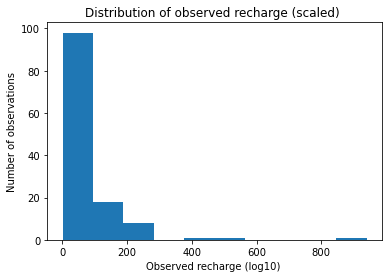

In [4]:
n_bins = 10

fig, axs = plt.subplots(1,1)

# We can set the number of bins with the `bins` kwarg
axs.hist(labels, bins=n_bins)
axs.set_title('Distribution of observed recharge (scaled) ')
axs.set_xlabel('Observed recharge (log10) ')
axs.set_ylabel('Number of observations')

In [5]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

In [6]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500)
# Train the model on training data
rf.fit(train_features[:,:-1], train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features[:,:-1])

### First run: statistics

In [7]:
# Use the forest's predict method on the training data
train_predictions = rf.predict(train_features[:,:-1])

# training set metrics
print('=== Prediction of training set ===')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(train_labels, train_predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(train_labels, train_predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(train_labels, train_predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(train_labels, train_predictions))
print('Explained Variance Score:', metrics.explained_variance_score(train_labels, train_predictions))
print('Max Error:', metrics.max_error(train_labels, train_predictions))
print('Median Absolute Error:', metrics.median_absolute_error(train_labels, train_predictions))
print('R^2:', metrics.r2_score(train_labels, train_predictions))

=== Prediction of training set ===
Mean Absolute Error (MAE): 15.28661284210527
Mean Squared Error (MSE): 1407.7227264050064
Root Mean Squared Error (RMSE): 37.51963121360612
Mean Absolute Percentage Error (MAPE): 0.6390320859594769
Explained Variance Score: 0.8963926975091636
Max Error: 235.65800000000002
Median Absolute Error: 5.165519999999981
R^2: 0.8963761636650112


Text(0, 0.5, 'Residual')

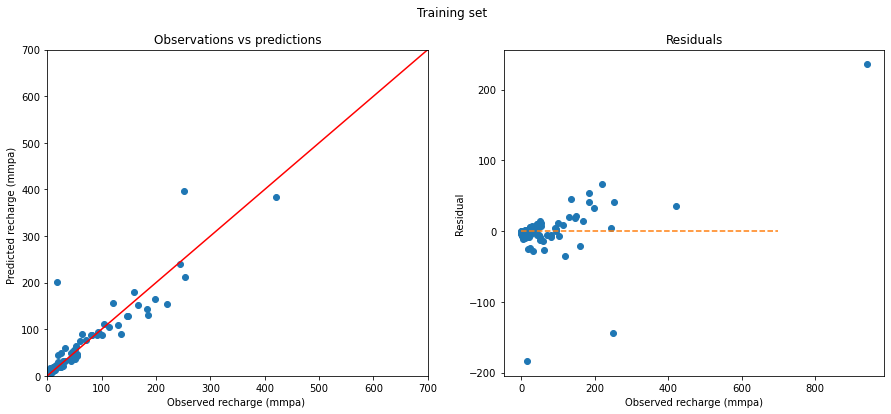

In [8]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Training set')
axs = axs.flatten()

axs[0].scatter(train_labels, train_predictions)
axs[0].plot(range(0,700), range(0,700), 'r')
axs[0].set_title('Observations vs predictions')
axs[0].set_xlabel('Observed recharge (mmpa) ')
axs[0].set_ylabel('Predicted recharge (mmpa) ')
axs[0].set_xlim([0,700])
axs[0].set_ylim([0,700])

axs[1].plot(train_labels, train_labels - train_predictions,marker='o',linestyle='')
axs[1].plot(range(0,700), np.zeros((700,)), '--')
axs[1].set_title('Residuals')
axs[1].set_xlabel('Observed recharge (mmpa)')
axs[1].set_ylabel('Residual')
#axs[1].set_xlim([0,450])
#axs[1].set_ylim([-450,450])

In [9]:
# testing set metrics
print('=== Prediction of testing set ===')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))

=== Prediction of testing set ===
Mean Absolute Error (MAE): 60.203061250000005
Mean Squared Error (MSE): 12765.194697860326
Root Mean Squared Error (RMSE): 112.98316112527709
Mean Absolute Percentage Error (MAPE): 2.2454577164924916
Explained Variance Score: -0.18133114516185467
Max Error: 456.67600000000004
Median Absolute Error: 30.2779
R^2: -0.19970653544745298


Text(0, 0.5, 'Residual')

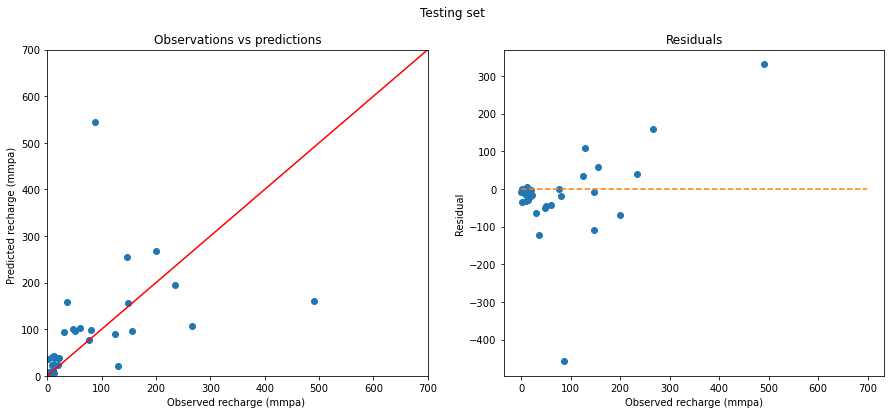

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Testing set')
axs = axs.flatten()

axs[0].scatter(test_labels, predictions)
axs[0].plot(range(0,700), range(0,700), 'r')
axs[0].set_title('Observations vs predictions')
axs[0].set_xlabel('Observed recharge (mmpa) ')
axs[0].set_ylabel('Predicted recharge (mmpa) ')
axs[0].set_xlim([0,700])
axs[0].set_ylim([0,700])

axs[1].plot(test_labels, test_labels - predictions,marker='o',linestyle='')
axs[1].plot(range(0,700), np.zeros((700,)), '--')
axs[1].set_title('Residuals')
axs[1].set_xlabel('Observed recharge (mmpa)')
axs[1].set_ylabel('Residual')
#axs[1].set_xlim([0,450])
#axs[1].set_ylim([-450,450])

## Feature importance analysis

In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LTA_P_mmpa           Importance: 0.39
Variable: Aridity              Importance: 0.23
Variable: Soil_group_FR        Importance: 0.11
Variable: DEM                  Importance: 0.08
Variable: LTA_PET_mm           Importance: 0.05
Variable: NDVI                 Importance: 0.05
Variable: LTA_WD_days          Importance: 0.03
Variable: Soil_group_AC        Importance: 0.01
Variable: Soil_group_PL        Importance: 0.01
Variable: Landcover_forest     Importance: 0.01
Variable: Aquifer_group_Basement Importance: 0.0
Variable: Aquifer_group_Sedimentary Importance: 0.0
Variable: Aquifer_group_Unconsolidated Importance: 0.0
Variable: Soil_group_AL        Importance: 0.0
Variable: Soil_group_AR        Importance: 0.0
Variable: Soil_group_CL        Importance: 0.0
Variable: Soil_group_CM        Importance: 0.0
Variable: Soil_group_DU        Importance: 0.0
Variable: Soil_group_FL        Importance: 0.0
Variable: Soil_group_GL        Importance: 0.0
Variable: Soil_group_KS        Impo

# Random Forest: second run
Total dataset size: 134 samples <br>
Training set: 100 samples <br>
Testing set: 34 samples

Features used (after importance analysis):
- LTA precipitation (mmpa)
- Aridity idx

In [12]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Aridity'), feature_list.index('LTA_P_mmpa'), 
                     feature_list.index('NDVI')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions
predictions = rf_most_important.predict(test_important)

In [13]:
# Use the forest's predict method on the training data
train_predictions = rf_most_important.predict(train_important)

# training set metrics
print('=== Prediction of training set ===')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(train_labels, train_predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(train_labels, train_predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(train_labels, train_predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(train_labels, train_predictions))
print('Explained Variance Score:', metrics.explained_variance_score(train_labels, train_predictions))
print('Max Error:', metrics.max_error(train_labels, train_predictions))
print('Median Absolute Error:', metrics.median_absolute_error(train_labels, train_predictions))
print('R^2:', metrics.r2_score(train_labels, train_predictions))

=== Prediction of training set ===
Mean Absolute Error (MAE): 15.636453223057652
Mean Squared Error (MSE): 1236.5092851633417
Root Mean Squared Error (RMSE): 35.16403397170669
Mean Absolute Percentage Error (MAPE): 0.6386931962243031
Explained Variance Score: 0.908983039094597
Max Error: 242.96799999999996
Median Absolute Error: 7.388600000000004
R^2: 0.9089793512677892


Text(0, 0.5, 'Residual')

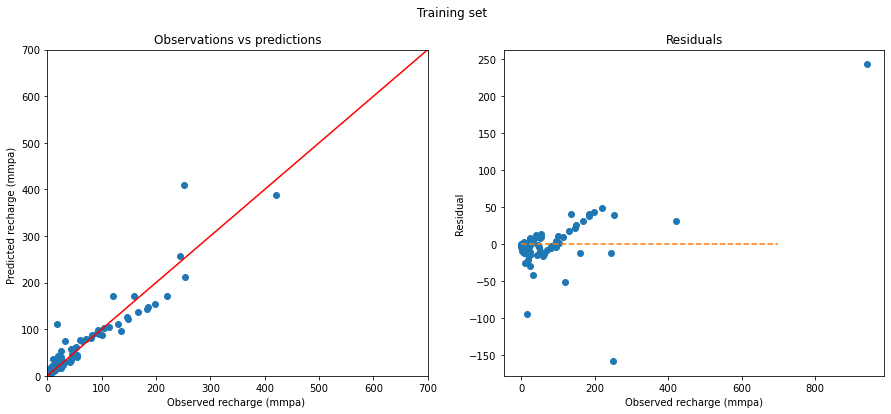

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Training set')
axs = axs.flatten()

axs[0].scatter(train_labels, train_predictions)
axs[0].plot(range(0,700), range(0,700), 'r')
axs[0].set_title('Observations vs predictions')
axs[0].set_xlabel('Observed recharge (mmpa) ')
axs[0].set_ylabel('Predicted recharge (mmpa) ')
axs[0].set_xlim([0,700])
axs[0].set_ylim([0,700])

axs[1].plot(train_labels, train_labels - train_predictions,marker='o',linestyle='')
axs[1].plot(range(0,700), np.zeros((700,)), '--')
axs[1].set_title('Residuals')
axs[1].set_xlabel('Observed recharge (mmpa)')
axs[1].set_ylabel('Residual')
#axs[1].set_xlim([0,450])
#axs[1].set_ylim([-450,450])

In [15]:
print('=== Testing set metrics ===')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))

=== Testing set metrics ===
Mean Absolute Error (MAE): 57.436508348214275
Mean Squared Error (MSE): 9930.061489485717
Root Mean Squared Error (RMSE): 99.64969387552436
Mean Absolute Percentage Error (MAPE): 3.1668724359501867
Explained Variance Score: 0.06738078777403678
Max Error: 340.076
Median Absolute Error: 24.944161904761852
R^2: 0.06674673216477123


Text(0, 0.5, 'Residual')

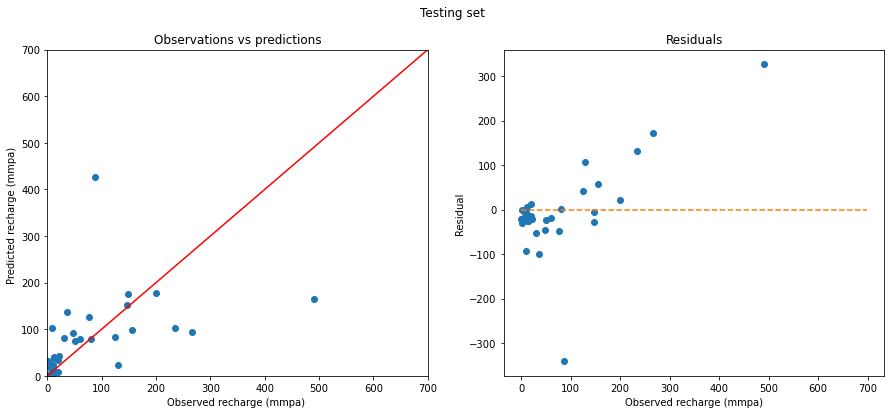

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Testing set')
axs = axs.flatten()

axs[0].scatter(test_labels, predictions)
axs[0].plot(range(0,700), range(0,700), 'r')
axs[0].set_title('Observations vs predictions')
axs[0].set_xlabel('Observed recharge (mmpa) ')
axs[0].set_ylabel('Predicted recharge (mmpa) ')
axs[0].set_xlim([0,700])
axs[0].set_ylim([0,700])

axs[1].plot(test_labels, test_labels - predictions,marker='o',linestyle='')
axs[1].plot(range(0,700), np.zeros((700,)), '--')
axs[1].set_title('Residuals')
axs[1].set_xlabel('Observed recharge (mmpa)')
axs[1].set_ylabel('Residual')
#axs[1].set_xlim([0,450])
#axs[1].set_ylim([-450,450])